## Load parameters

In [1]:
parameter_file = '../parameters/STAR_get_bam.yaml'

import yaml
import sys
import glob
import os
import seaborn as sns
from os.path import join, basename
import pandas as pd
import matplotlib.pyplot as plt
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

print(doc)

sys.path.append(doc["NGS_folder"])
sys.path.append(os.path.join(doc["NGS_folder"],'Modules'))
from f01_file_process import *
p = dic2obj(**doc)
p


{'contact': 'ishamie14@gmail.com', 'RawDataPath': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/', 'NGS_folder': '/home/isshamie/software/NGS-Pipeline', 'thread': 8, 'ref_fa': '/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna', 'gff': '/data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3', 'annotation': '/data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3', 'gtf': '/data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gtf', 'QC': False, 'trim_reads': False, 'trimmomatic_path': '/home/shangzhong/Installation/Trimmomatic-0.32/Trimmomatic-0.33/trimmomatic-0.33.jar', 'trim_jobs_per_batch': 6, 'adapter': '', 'picard': '/home/shangzhong/Installation/picard-tools-1.141/picard.jar', 'star_jobs_per_batch': 2, 'star_index_path': '/data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db', 'STAR_index_path': '/data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db', 'star_pass': 2, 'star_params': [], 'htseq_anno_source': 'ncbi', '

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if sys.path[0] == '':


In [2]:
file_path = p.RawDataPath
thread = p.thread
QC = p.QC
# all parameter
ref_fa = p.ref_fa
annotation = p.gff
gtf_anno = p.gtf
# trimmomatic parameter
trim = p.trim_reads
trimmomatic = p.trimmomatic_path
trim_batch = p.trim_jobs_per_batch
adapter = p.adapter
# star parameter
star_batch = p.star_jobs_per_batch
db_path = p.STAR_index_path
# htseq parameter
htseq_anno_source = p.htseq_anno_source
strand = p.strand_specific
id_name = p.id_name

contact = p.contact

## Make directories

In [3]:
import os
import glob
homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/home/isshamie/software/homer/bin/homer


In [4]:
file_path = p.RawDataPath
thread = p.thread
QC = p.QC
# all parameter
ref_fa = p.ref_fa
annotation = p.gff
gtf_anno = p.gtf
# trimmomatic parameter
trim = p.trim_reads
trimmomatic = p.trimmomatic_path
trim_batch = p.trim_jobs_per_batch
adapter = p.adapter
# star parameter
star_batch = p.star_jobs_per_batch
db_path = p.STAR_index_path
# htseq parameter
htseq_anno_source = p.htseq_anno_source
strand = p.strand_specific
id_name = p.id_name

contact = p.contact

##  Directories

In [5]:
qc_dir = join(file_path,"QC")
multiqc_dir = join(file_path,"multiqc")

trim_qc_dir = join(file_path,"trim_QC")
trim_multiqc_dir = join(file_path,"trim_multiqc")

bam_dir = join(file_path, "sortBam")
ht_dir = join(file_path, 'htseq')
ht_reverse_dir = join(file_path, 'htseq_rev')
RNA_SeQC = join(file_path,'RNA_SeQC')

## Load HTseq results: strand normal

In [11]:
import numpy as np

/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL4_Lung_S4_L006_R1_001.fastq.sort.bam
Lung_S4


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL7_Brain2_S7_L006_R1_001.fastq.sort.bam
Brain2_S7
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL6_Heart_S6_L006_R1_001.fastq.sort.bam
Heart_S6
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL10_Misc_S10_L006_R1_001.fastq.sort.bam
Misc_S10
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL3_Spleen_S3_L006_R1_001.fastq.sort.bam
Spleen_S3
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL8_Muscle_S8_L006_R1_001.fastq.sort.bam
Muscle_S8
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL11_Brain7-1_S11_L006_R1_001.fastq.sort.bam
Brain7-1_S11
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL1_Pancreas_S1_L006_R1_001.fastq.sort.bam
Pancreas_S1
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL2_ReproductiveTract_S2_L006_R1_001.fastq.sort.bam
ReproductiveTract_S2
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL9_Kidney_S9_L006_R1_001.fastq.sort.bam

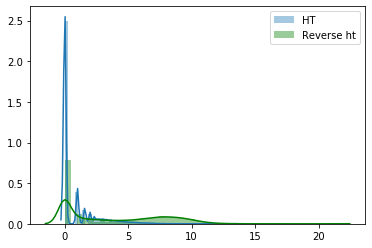

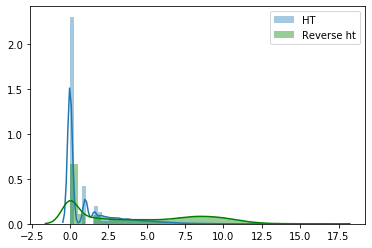

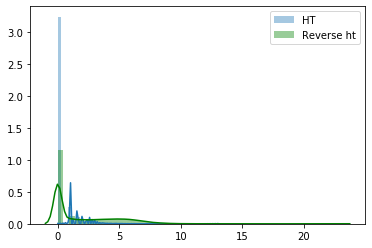

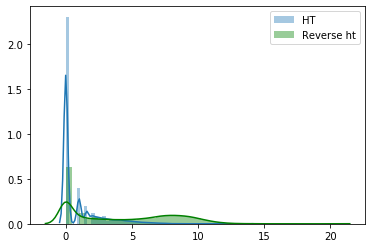

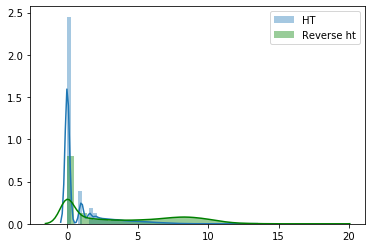

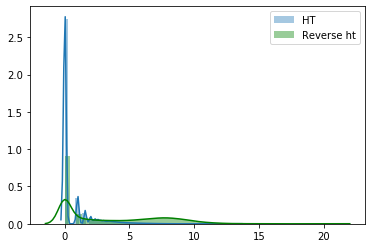

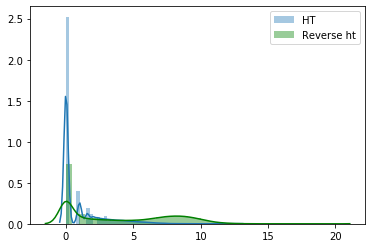

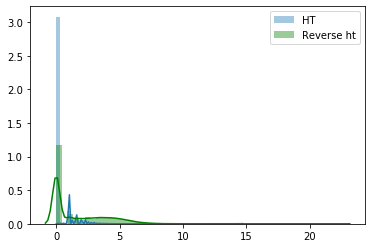

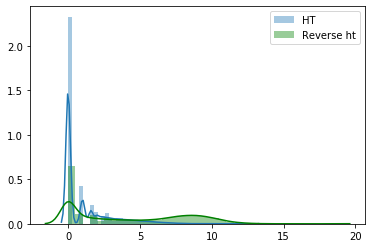

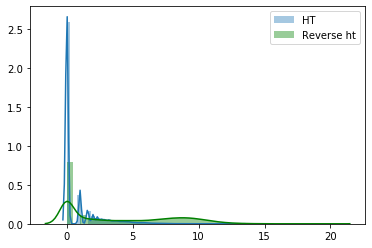

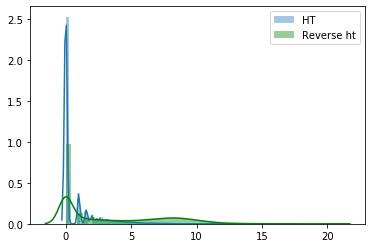

In [15]:
all_df = pd.DataFrame()


for bam_f in glob.glob(bam_dir+"/*bam"):
    print(bam_f)
    sid = "_".join(basename(bam_f).split("_")[1:3])
    print(sid)
    #NL9_Kidney_S9_L006_R1_001.fastq.sort
    count_rev_f = join(ht_reverse_dir, sid +'.count.txt')
    count_f = join(ht_dir,basename(bam_f).replace(".bam", ".count.txt"))
    df = pd.read_csv(count_f,sep="\t", header=None, index_col=0)
    df = df[~(df.index.str.contains("_"))]
    df.columns = [sid + " Count"]
    
    df_rev = pd.read_csv(count_rev_f,sep="\t", header=None, index_col=0)
    df_rev = df_rev[~(df_rev.index.str.contains("_"))]
    df_rev.columns = [sid + " Count Reverse"]
    df
    
    all_df = pd.concat((all_df,df,df_rev), axis=1)
    #cmd = f"htseq-count -f bam -s reverse -t exon -i gene {bam_f} {annotation} > {join(ht_reverse_dir, sid +'.count.txt')}"
    #print(cmd)
    f = plt.figure()
    sns.distplot(np.log2(df+1))
    sns.distplot(np.log2(df_rev+1), color='g')
    plt.legend(["HT", "Reverse ht"])

In [16]:
all_df.shape

(59732, 22)

In [17]:
all_df

Lung_S4 Count  Lung_S4 Count Reverse  Brain2_S7 Count  \
100682525            0.0                    NaN              0.0   
100682526            0.0                    NaN              0.0   
100682527           39.0                    NaN             19.0   
100682528            0.0                    NaN              9.0   
100682529            0.0                    NaN              0.0   
...                  ...                    ...              ...   
Zxdc                 NaN                  442.0              NaN   
Zyg11b               NaN                  555.0              NaN   
Zyx                  NaN                 1511.0              NaN   
Zzef1                NaN                 1919.0              NaN   
Zzz3                 NaN                 1101.0              NaN   

           Brain2_S7 Count Reverse  Heart_S6 Count  Heart_S6 Count Reverse  \
100682525                      NaN             2.0                     NaN   
100682526                      NaN             0.0                     NaN   
100682527                      NaN             9.0                     NaN   
100682528                      NaN             0.0                     NaN   
100682529                      NaN             0.0                     NaN   
...                            ...             ...                     ...   
Zxdc                         429.0             NaN                    44.0   
Zyg11b                      3372.0             NaN                   106.0   
Zyx                          336.0             NaN                   157.0   
Zzef1                       1882.0             NaN                   103.0   
Zzz3                        1777.0             NaN                    72.0   

           Misc_S10 Count  Misc_S10 Count Reverse  Spleen_S3 Count  \
100682525             0.0                     NaN              0.0   
100682526             0.0                     NaN              0.0   
100682527            18.0                     NaN             18.0   
100682528             2.0                     NaN              4.0   
100682529             1.0                     NaN              0.0   
...                   ...                     ...              ...   
Zxdc                  NaN                   520.0              NaN   
Zyg11b                NaN                  2033.0              NaN   
Zyx                   NaN                   616.0              NaN   
Zzef1                 NaN                  1574.0              NaN   
Zzz3                  NaN                  1060.0              NaN   

           Spleen_S3 Count Reverse  ...  Brain7-1_S11 Count  \
100682525                      NaN  ...                 0.0   
100682526                      NaN  ...                 0.0   
100682527                      NaN  ...                29.0   
100682528                      NaN  ...                 0.0   
100682529                      NaN  ...                 0.0   
...                            ...  ...                 ...   
Zxdc                         454.0  ...                 NaN   
Zyg11b                       671.0  ...                 NaN   
Zyx                          311.0  ...                 NaN   
Zzef1                       3705.0  ...                 NaN   
Zzz3                        1764.0  ...                 NaN   

           Brain7-1_S11 Count Reverse  Pancreas_S1 Count  \
100682525                         NaN                0.0   
100682526                         NaN                0.0   
100682527                         NaN                0.0   
100682528                         NaN                0.0   
100682529                         NaN                0.0   
...                               ...                ...   
Zxdc                            625.0                NaN   
Zyg11b                          995.0                NaN   
Zyx                             846.0                NaN   
Zzef1                          1872.0                NaN   

## Reverse seems to be the correct way to do it

In [18]:
tpm_df = pd.DataFrame()


for bam_f in glob.glob(bam_dir+"/*bam"):
    print(bam_f)
    sid = "_".join(basename(bam_f).split("_")[1:3])
    print(sid)
    #NL9_Kidney_S9_L006_R1_001.fastq.sort
    count_rev_f = join(ht_reverse_dir, sid +'.count.txt')
    count_f = join(ht_dir,basename(bam_f).replace(".bam", ".count.txt"))
    df_rev = pd.read_csv(count_rev_f,sep="\t", header=None, index_col=0)
    df_rev = df_rev[~(df_rev.index.str.contains("_"))]
    df_rev.columns = [sid + " Count Reverse"]
    df
    
    tpm_df = pd.concat((tpm_df,df_rev), axis=1)
    #cmd = f"htseq-count -f bam -s reverse -t exon -i gene {bam_f} {annotation} > {join(ht_reverse_dir, sid +'.count.txt')}"
    #print(cmd)


/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL4_Lung_S4_L006_R1_001.fastq.sort.bam
Lung_S4
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL7_Brain2_S7_L006_R1_001.fastq.sort.bam
Brain2_S7
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL6_Heart_S6_L006_R1_001.fastq.sort.bam
Heart_S6
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL10_Misc_S10_L006_R1_001.fastq.sort.bam
Misc_S10
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL3_Spleen_S3_L006_R1_001.fastq.sort.bam
Spleen_S3
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL8_Muscle_S8_L006_R1_001.fastq.sort.bam
Muscle_S8
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL11_Brain7-1_S11_L006_R1_001.fastq.sort.bam
Brain7-1_S11
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL1_Pancreas_S1_L006_R1_001.fastq.sort.bam
Pancreas_S1
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL2_ReproductiveTract_S2_L006_R1_001.fastq.sort.bam
ReproductiveTr

In [20]:
tpm_df.sum(axis=0)

Lung_S4 Count Reverse                 11051157
Brain2_S7 Count Reverse               11402105
Heart_S6 Count Reverse                10883432
Misc_S10 Count Reverse                11813587
Spleen_S3 Count Reverse                9897029
Muscle_S8 Count Reverse               12544540
Brain7-1_S11 Count Reverse             9106097
Pancreas_S1 Count Reverse              8081610
ReproductiveTract_S2 Count Reverse    10501274
Kidney_S9 Count Reverse               14215209
Liver_S5 Count Reverse                13476977
dtype: int64

In [21]:
all_df.sum(axis=0)

Lung_S4 Count                           171429.0
Lung_S4 Count Reverse                 11051157.0
Brain2_S7 Count                         280969.0
Brain2_S7 Count Reverse               11402105.0
Heart_S6 Count                           38691.0
Heart_S6 Count Reverse                10883432.0
Misc_S10 Count                          208849.0
Misc_S10 Count Reverse                11813587.0
Spleen_S3 Count                         256482.0
Spleen_S3 Count Reverse                9897029.0
Muscle_S8 Count                         129911.0
Muscle_S8 Count Reverse               12544540.0
Brain7-1_S11 Count                      203573.0
Brain7-1_S11 Count Reverse             9106097.0
Pancreas_S1 Count                        48892.0
Pancreas_S1 Count Reverse              8081610.0
ReproductiveTract_S2 Count              270872.0
ReproductiveTract_S2 Count Reverse    10501274.0
Kidney_S9 Count                         186602.0
Kidney_S9 Count Reverse               14215209.0
Liver_S5 Count      